## Projeto Integrador - Desmatamento Amazonia Legal - Deter - 2015 até 2019

In [1]:
# import biblioteca

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
sns.set()

from datetime import datetime

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [7]:
# Alertas Deter 2015 até 2019 -  da Amazônia Legal

Deter = gpd.read_file('deter_public.shp', index_col=['VIEW_DATE'], parse_dates=['VIEW_DATE'])

In [8]:
Deter.head()

,CLASSNAME,QUADRANT,PATH_ROW,VIEW_DATE,SENSOR,SATELLITE,AREAUCKM,UC,AREAMUNKM,MUNICIPALI,UF,geometry
0,DESMATAMENTO_CR,None,172117,2019-05-17,WFI,CBERS-4,0.0,None,0.228726,Brasnorte,MT,POLYGON ((-57.59144596156182 -12.4739255378332...
1,DESMATAMENTO_CR,None,172111,2019-05-17,WFI,CBERS-4,0.0,None,0.306387,Porto Velho,RO,POLYGON ((-62.57766439519565 -8.62607790826882...
2,DEGRADACAO,None,170117,2019-01-10,WFI,CBERS-4,0.0,None,0.490981,Comodoro,MT,POLYGON ((-60.26175750440524 -13.9883906802856...
3,DESMATAMENTO_CR,None,165105,2019-09-19,WFI,CBERS-4,0.0,None,0.125955,Pacaja,PA,POLYGON ((-51.16452764106212 -3.70441319771929...
4,DESMATAMENTO_CR,D,312080,2016-08-29,AWiFS,ResourceSat-2,0.0,None,0.441924,Novo Aripuana,AM,POLYGON ((-60.13446049798053 -6.72362630702520...


In [9]:
type(Deter.VIEW_DATE[0])

str

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(Deter.AREAMUNKM)
plt.title('Ads watched (hourly data)')
plt.grid(True)
plt.show()

In [29]:
Deter.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 133619 entries, 0 to 133618
Data columns (total 12 columns):
CLASSNAME     133619 non-null object
QUADRANT      49523 non-null object
PATH_ROW      133619 non-null object
VIEW_DATE     133619 non-null object
SENSOR        133619 non-null object
SATELLITE     133619 non-null object
AREAUCKM      133619 non-null float64
UC            5845 non-null object
AREAMUNKM     133619 non-null float64
MUNICIPALI    133617 non-null object
UF            133617 non-null object
geometry      133619 non-null object
dtypes: float64(2), object(10)
memory usage: 12.2+ MB


In [30]:
Deter_1 = Deter.groupby("CLASSNAME")["AREAMUNKM"].sum().reset_index()

In [31]:
Deter_1.sort_values(by= "CLASSNAME", ascending=False)

,CLASSNAME,AREAMUNKM
7,MINERACAO,248.787584
6,DESMATAMENTO_VEG,990.206897
5,DESMATAMENTO_CR,18245.638130
4,DEGRADACAO,10665.594676
3,CS_GEOMETRICO,3363.530926
2,CS_DESORDENADO,3126.491379
1,CORTE_SELETIVO,2.307220
0,CICATRIZ_DE_QUEIMADA,48545.830474


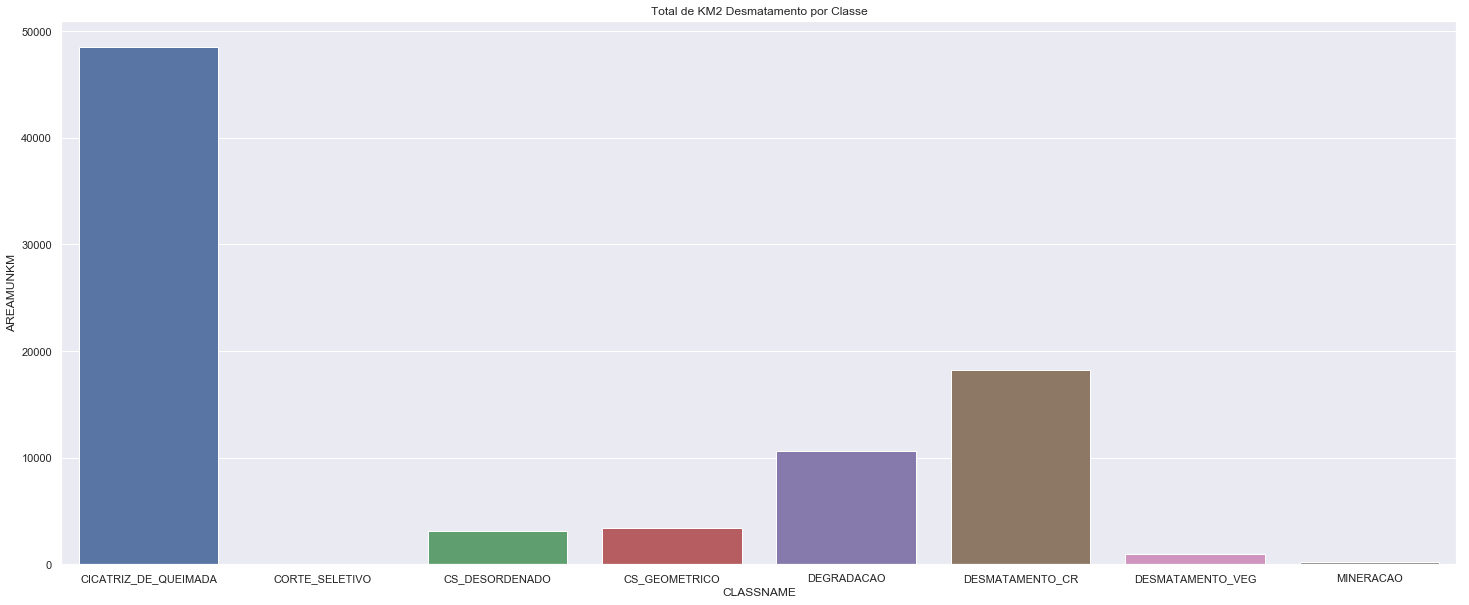

In [32]:
plt.figure(figsize=(25,10))
plt.title("Total de KM2 Desmatamento por Classe")
sns.barplot(x="CLASSNAME", y="AREAMUNKM", data=Deter_1); 

In [46]:
Deter_2 = Deter.groupby("UF")["AREAMUNKM"].sum().reset_index()

In [47]:
Deter_2.sort_values(by= "UF", ascending=False)

,UF,AREAMUNKM
8,TO,2167.310030
7,RR,5783.096902
6,RO,5037.751596
5,PA,28493.752521
4,MT,30996.382369
3,MA,5792.362020
2,AP,147.631326
1,AM,5365.431806
0,AC,1404.668716


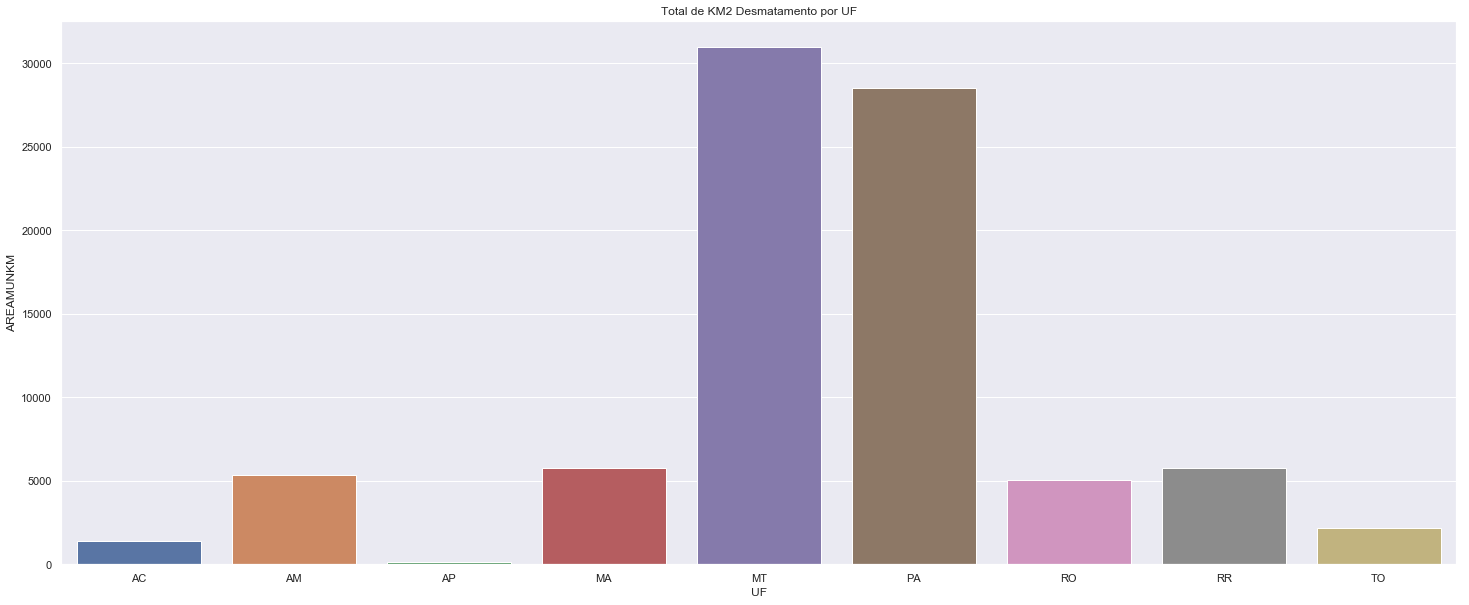

In [50]:
plt.figure(figsize=(25,10))
plt.title("Total de KM2 Desmatamento por UF")
sns.barplot(x="UF", y="AREAMUNKM", data=Deter_2); 

In [36]:
Deter['VIEW_DATE'].value_counts(dropna=False)

2019-07-20    1385
2016-08-17    1362
2019-09-16    1328
2016-09-29    1309
2018-11-17    1170
              ... 
2018-08-20       1
2019-05-11       1
2017-07-23       1
2019-02-26       1
2017-01-24       1
Name: VIEW_DATE, Length: 815, dtype: int64

In [37]:
Deter_1 = Deter['VIEW_DATE'].value_counts(dropna=False)

In [42]:
Deter_1.head(10)

2019-07-20    1385
2016-08-17    1362
2019-09-16    1328
2016-09-29    1309
2018-11-17    1170
2017-10-04    1144
2018-07-23    1133
2019-08-29    1123
2019-09-19    1123
2017-09-19    1120
Name: VIEW_DATE, dtype: int64